# MLP para classificação

Este notebook apesenta a contrução de uma Rede Neural de MLP para resolver o problema de classificação de vestuário. A base de dados utilizando encontra-se disponível no site https://github.com/zalandoresearch/fashion-mnist. Esta base de dados consiste de 70000 imagens as quais podem ser classificadas nas seguintes classes: 

*	T-shirt/top
*	Trouser
*	Pullover
*	Dress
*	Coat
*	Sandal
*	Shirt
*   Sneaker
*	Bag
*	Ankle boot

Alguns exemplos das imagens contidas nesta base de dados são apresentados a seguir:

![alt text](fashion-mnist-sprite.png "Exemplos")

## Carregamento dos pacotes a serem utilizados

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


## Carregamento do dataset

In [30]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explorando o dataset

In [31]:
print("numero de amostras de treinamento", len(train_images))
print("numero de amostras de teste", len(test_images))

numero de amostras de treinamento 60000
numero de amostras de teste 10000


In [32]:
print("Dimensões dos dados de entrada", train_images.shape)
print("Dimensões dos dados do target", train_labels.shape)

Dimensões dos dados de entrada (60000, 28, 28)
Dimensões dos dados do target (60000,)


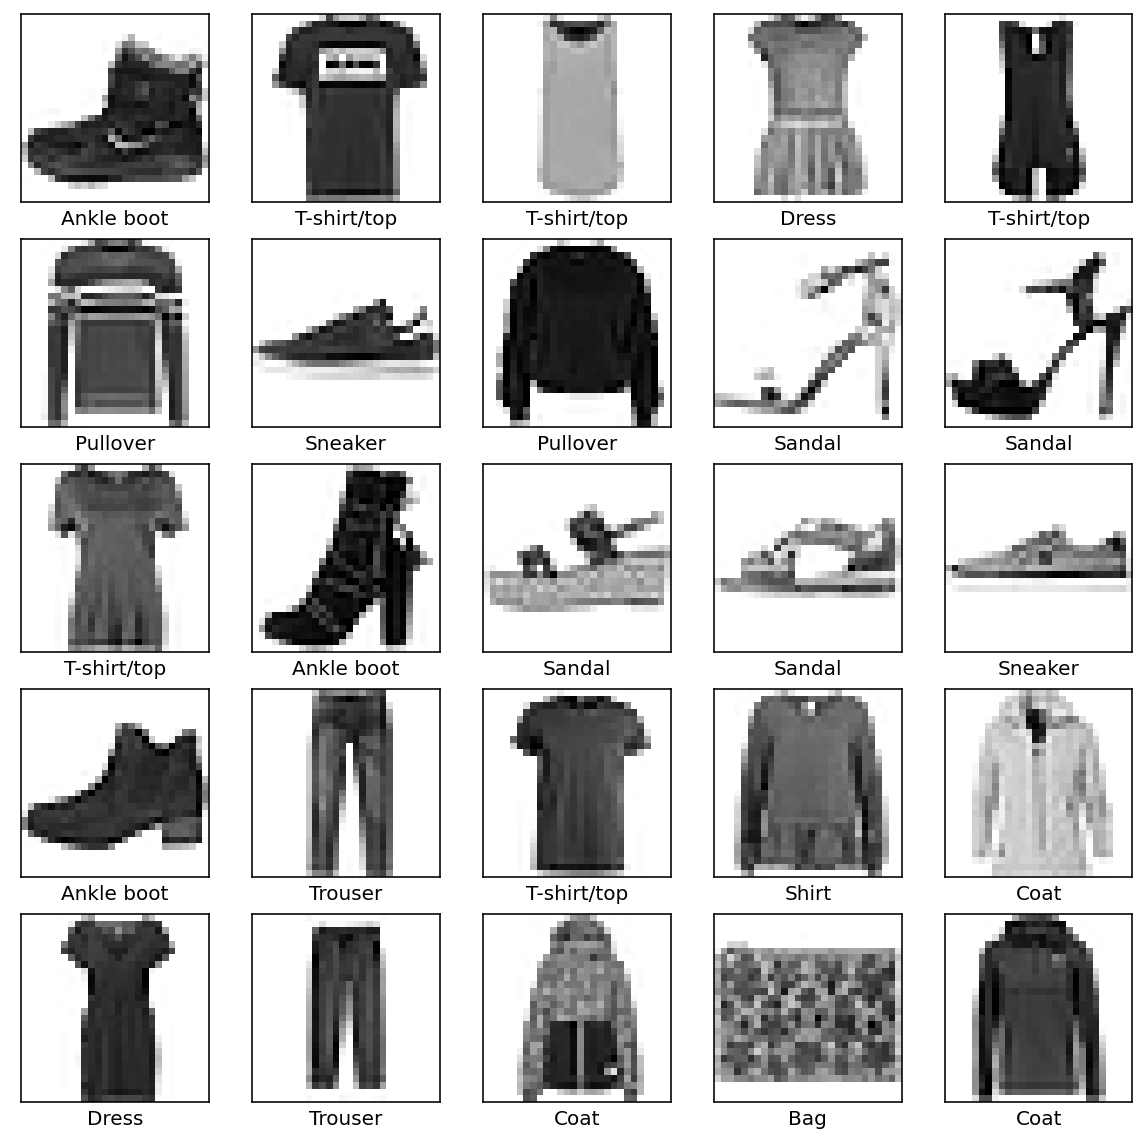

In [33]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Existem diversas ferramentas de visualização de dados multidimensionais, entre elas destaca-se a tecnica t-SNET (https://distill.pub/2016/misread-tsne/). Um exemplo de visualização empregando a base de dados descrita neste notebook é apresentado a seguir.  
![alt text](embedding_fashion_mnist.gif "Title")

Exemplo online http://projector.tensorflow.org/

In [34]:
print("Maximo e Minimo do conjunto de treinamento", np.max(train_images), np.min(train_images))

Maximo e Minimo do conjunto de treinamento 255 0


## Preprocessamento

Na caixa de codigo anterior foi visto que as imagens de entrada da rede estão na escala de 0 a 255. Na proxima caixa voce implementara a padronização destas imagens no range de 0-1.

In [35]:
train_images = train_images / 255.0

test_images = test_images / 255.0

## Definição do modelo

Na proxima caixa de texto voce implementara um modelo de rede neural MLP de duas camadas com 128 e 10 neuronios respetivamente. Experimente variar o numero de neuronios e de camadas. Nas camadas intermediarias (keras.layers.Dense) use qualquer função de ativação não linear (ex: relu(tf.nn.relu)) e na camada de saida use a ativação softmax(tf.nn.softmax)) 

Já que estamos usando uma rede totalmente conectada, lembre-se que para conseguir usar as imagens como entrada do modelo é necessário vetorizar as imagens (keras.layers.Flatten)

Dica: Procure a documentação das funções citadas!

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [37]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(128, activation='relu'),
                         keras.layers.Dense(10, activation='softmax')
                         ])

In [38]:
#help(Flatten)

## Compile o modelo (https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile)

Para preparar o modelo é necessário mais algumas configurações.

loss - Função custo a ser otimizado Ex: entropia cruzada, mse.

optimizer - Otimizador selecionado Ex: adam, sgd. 

metrics - Métricas a serem avaliadas. Ex: Acurácia, F1.

In [39]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Treinamento da rede neural: (https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit)

Vamos adicionar algumas funcionalidades ao nosso treinamento. Usaremos a técnica de parada precose e usaremos o método de salvar o modelo do tensorflow

In [40]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint('fashion_mlp_model.h5', save_best_only=True, monitor='val_loss', mode='min')
# reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

In [41]:
history = model.fit(train_images, train_labels, batch_size=40, epochs=30, 
                    validation_split=0.2, verbose=True, callbacks=[earlyStopping, mcp_save])

Epoch 1/30
1200/1200 [==============================] - 2s 1ms/step - loss: 0.5196 - accuracy: 0.8190 - val_loss: 0.4440 - val_accuracy: 0.8453
Epoch 2/30
1200/1200 [==============================] - 2s 1ms/step - loss: 0.3916 - accuracy: 0.8583 - val_loss: 0.3771 - val_accuracy: 0.8633
Epoch 3/30
1200/1200 [==============================] - 2s 2ms/step - loss: 0.3490 - accuracy: 0.8754 - val_loss: 0.3683 - val_accuracy: 0.8668
Epoch 4/30
1200/1200 [==============================] - 2s 2ms/step - loss: 0.3214 - accuracy: 0.8824 - val_loss: 0.3582 - val_accuracy: 0.8695
Epoch 5/30
1200/1200 [==============================] - 2s 2ms/step - loss: 0.3028 - accuracy: 0.8881 - val_loss: 0.3231 - val_accuracy: 0.8854
Epoch 6/30
1200/1200 [==============================] - 2s 2ms/step - loss: 0.2883 - accuracy: 0.8942 - val_loss: 0.3428 - val_accuracy: 0.8773
Epoch 7/30
1200/1200 [==============================] - 2s 2ms/step - loss: 0.2746 - accuracy: 0.8984 - val_loss: 0.3230 - val_accuracy:

## Plot historico do treinamento e validação

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


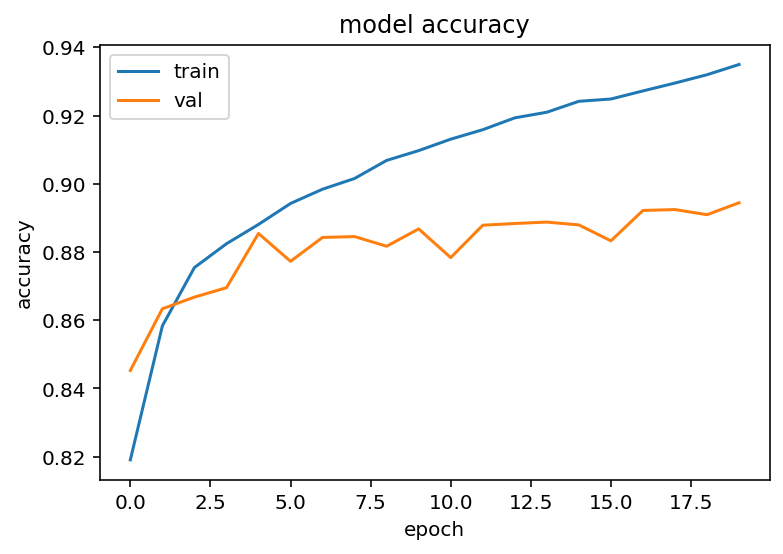

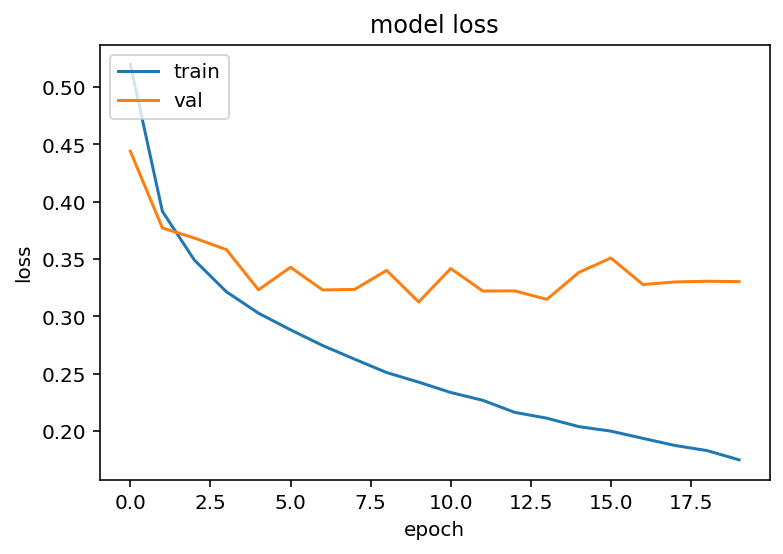

In [42]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Evaluate accuracy

In [43]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3607 - accuracy: 0.8879
Test accuracy: 0.8878999948501587


## Make predictions
With the model trained, we can use it to make predictions about some images.

In [44]:
predictions = model.predict(test_images)

In [45]:
image_selected = 300
predicted_label = np.argmax(predictions[image_selected])
true_label = test_labels[image_selected]
predictions_array = predictions[image_selected]

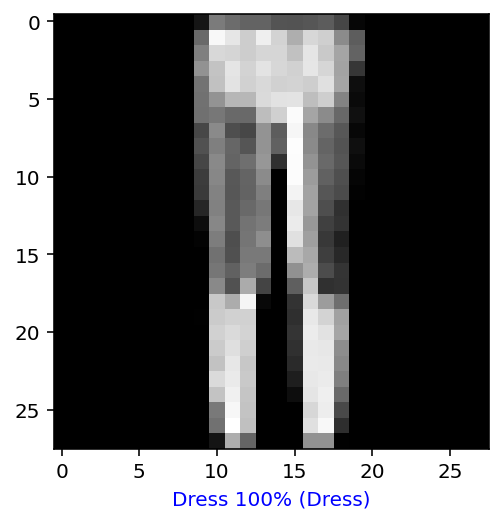

In [46]:
plt.imshow(test_images[predicted_label], cmap="gray")
if predicted_label == true_label:
    color = 'blue'
else:
    color = 'red'
plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
plt.show()